In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Objective**
Attenuation Relations between Iran and Sharjah horizontal peak ground acceleration

**Data Description**
Dataset consist of 130 earthquakes and 31 variables for the BHRC (Iran) dataset and for the
UOSS (Sharjah) dataset there are 130 earthquakes and 25 variable, after removing all the
earthquake without time series we finally get 89 earthquake records, These dataset consist
details of the earthquake i.e. earthquake number, station name, Un.PGA, time series, longitude,
latitude, magnitude type, epicentral distance, depth and effective duration, vs30 (m/s) and fault
type etc.  Finally we Apply input from Iran data to 10 developed attenuation equations from
literature and compare the output.

**Dependent Variable**
Peak ground acceleration, Horizontal peak ground acceleration

**Independent Variable**
earthquake number, station name, Un.PGA, time series, longitude, latitude, magnitude type,
epicentral distance, depth and effective duration, vs30 (m/s) and fault type etc.

**Proposed model**
Ensemble methods is a machine learning technique that combines several base models in order
to produce one optimal predictive model. We will design and implement a cutting edge
advanced statistical model using random forest algorithm and get the output for the same
technique after that, we use another technique to build a new model using KNN and the third
model is build using logistic regression. Then we will compare the result of all these algorithm,
finally we will build a new model by combining all these three techniques together (Ensemble
Technique), so that we can get a more accurate model for our research work.

In [2]:
final_BHRC = pd.read_excel('waveforms_EDITED.xlsx',sheet_name='Final BHRC')


In [3]:
final_BHRC.columns = ['Earthquake No.', 'Station Name', 'Record No', 'Date', 'Unknown BHRC',
       'Time', 'AM-PM', 'Un. PGA(cm/s/s)', 'Latitude', 'Longitude',
       'Epicentral Distance', 'ML', 'MW', 'MN', 'MS', 'mb', 'Reference',
       'Station Code']

In [4]:
final_BHRC.head()

,Earthquake No.,Station Name,Record No,Date,Unknown BHRC,Time,AM-PM,Un. PGA(cm/s/s),Latitude,Longitude,Epicentral Distance,ML,MW,MN,MS,mb,Reference,Station Code
0,1,Ban Mazaran,7373/01,2017-11-13,19,04:27:55,AM,63.0,34.49,45.74,22,NaN,4.8,NaN,NaN,NaN,BHRC,GDM
1,2,Ban Mazaran,7373/02,2017-11-13,19,04:36:12,AM,21.0,34.50,45.78,19,NaN,4.4,NaN,NaN,NaN,BHRC,BIR
2,3,Javanrood,7398,2017-11-12,7,06:18:16,PM,207.0,34.81,45.91,53,NaN,7.3,NaN,NaN,NaN,BHRC,SAD
3,4,Faryab,7260,2017-10-23,1,12:24:14,AM,60.0,27.76,57.10,40,NaN,5.4,NaN,NaN,NaN,BHRC,SDD
4,5,Tikmedash,7253,2017-10-18,2,05:35:35,PM,11.0,37.92,47.10,25,NaN,4.6,NaN,NaN,NaN,BHRC,MHN


In [5]:
final_BHRC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
Earthquake No.         126 non-null int64
Station Name           126 non-null object
Record No              126 non-null object
Date                   126 non-null datetime64[ns]
Unknown BHRC           126 non-null int64
Time                   126 non-null object
AM-PM                  126 non-null object
Un. PGA(cm/s/s)        126 non-null float64
Latitude               126 non-null float64
Longitude              126 non-null float64
Epicentral Distance    126 non-null int64
ML                     12 non-null float64
MW                     126 non-null float64
MN                     0 non-null float64
MS                     0 non-null float64
mb                     0 non-null float64
Reference              126 non-null object
Station Code           126 non-null object
dtypes: datetime64[ns](1), float64(8), int64(3), object(6)
memory usage: 17.8+ KB


In [6]:
df = pd.read_excel('Last_Predicted_and_Observed_Outputs.xlsx',sheet_name=0)

In [7]:
df.head()

,Earthquake No.,Inputs (Iran ),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Earthquake magnitude of Sharjah,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Observed horizontal peak ground acceleration,Unnamed: 23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Eq.5,Eq.6,NaN,Eq.7,NaN,Eq.8,Eq.9,Eq.10,NaN,NaN
1,NaN,Epicentral Distance,ML,MW,Depth,Effective duration (s) L,Effective duration (s) V,Effective duration (s) T,Vs30 (m/s),NaN,...,NaN,PGAH,PGAV,PGAH,PGAV,NaN,NaN,NaN,BHRC(cm/s^2),UOSS(g)
2,1.0,19,NaN,4.6,22,2.17,4.61,1.67,891,4.9,...,192.048,58.6606,27.8426,23.5682,10.8638,0.153049,0.0420549,0.0946283,54,0.442468
3,2.0,21,NaN,5.1,10,11.6,6.62,10.42,NaN,5.1,...,270.187,NaN,NaN,40.2426,18.395,0.670179,0.0523675,NaN,21,0.139353
4,3.0,70,NaN,5.1,10,14.15,17.13,13.55,514,4.8,...,66.4125,21.3731,10.7709,12.0168,5.57909,0.12928,0.0188523,0.0297881,12,0.52633


In [8]:
# Inputs provided to predict PGA

bhrc_ip = df[['Earthquake No. ', 'Inputs (Iran )', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']]
bhrc_ip.head()

,Earthquake No.,Inputs (Iran ),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Epicentral Distance,ML,MW,Depth,Effective duration (s) L,Effective duration (s) V,Effective duration (s) T,Vs30 (m/s)
2,1.0,19,NaN,4.6,22,2.17,4.61,1.67,891
3,2.0,21,NaN,5.1,10,11.6,6.62,10.42,NaN
4,3.0,70,NaN,5.1,10,14.15,17.13,13.55,514


In [9]:
bhrc_ip.columns=['Earthquake No.', 'Epicentral Distance', 'ML', 'MW', 'Depth',
       'Effective duration (s) L', 'Effective duration (s)  V',
       'Effective duration (s)  T', 'Vs30 (m/s)']

In [10]:
bhrc_ip=bhrc_ip.drop([0,1])
bhrc_ip.head()

,Earthquake No.,Epicentral Distance,ML,MW,Depth,Effective duration (s) L,Effective duration (s) V,Effective duration (s) T,Vs30 (m/s)
2,1.0,19,NaN,4.6,22,2.17,4.61,1.67,891
3,2.0,21,NaN,5.1,10,11.6,6.62,10.42,NaN
4,3.0,70,NaN,5.1,10,14.15,17.13,13.55,514
5,4.0,16,NaN,5.4,16,5.46,7.33,2.97,582
6,5.0,35,NaN,5.1,9,NaN,NaN,NaN,971


In [11]:
bhrc_ip.reset_index(inplace=True)
bhrc_ip.drop('index',axis=1,inplace=True)
bhrc_ip['Earthquake No.'] = bhrc_ip['Earthquake No.'].apply(int)
bhrc_ip.set_index('Earthquake No.',inplace=True)
bhrc_ip.head()

,Epicentral Distance,ML,MW,Depth,Effective duration (s) L,Effective duration (s) V,Effective duration (s) T,Vs30 (m/s)
Earthquake No.,,,,,,,,
1,19,NaN,4.6,22,2.17,4.61,1.67,891
2,21,NaN,5.1,10,11.6,6.62,10.42,NaN
3,70,NaN,5.1,10,14.15,17.13,13.55,514
4,16,NaN,5.4,16,5.46,7.33,2.97,582
5,35,NaN,5.1,9,NaN,NaN,NaN,971


In [12]:
bhrc_update = pd.merge(left=final_BHRC, right=bhrc_ip, on='Earthquake No.')
bhrc_update['Un. PGA(cm/s/s)'] = bhrc_update['Un. PGA(cm/s/s)'].apply(int)

In [13]:
bhrc_metadata = pd.read_excel('Last_Predicted_and_Observed_Outputs.xlsx',sheet_name='BHRC_Metadata')
bhrc_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 13 columns):
Earthquake No.             130 non-null int64
Time Series Avalability    130 non-null int64
Station Name               130 non-null object
Record No                  130 non-null object
Date                       130 non-null datetime64[ns]
Time                       130 non-null object
Unnamed: 6                 130 non-null object
Latitude                   130 non-null float64
Longitude                  130 non-null float64
Reference                  130 non-null object
Station Code               130 non-null object
Province                   130 non-null object
Fault Type                 127 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 13.3+ KB


In [14]:
ts_fault = bhrc_metadata[['Earthquake No. ','Time Series Avalability','Fault Type']]
ts_fault.columns = ['Earthquake No.','Time Series Avalability','Fault Type']
ts_f = pd.get_dummies(data=ts_fault, dummy_na=True, columns=['Fault Type'], drop_first=True)
ts_f.head()
bhrc_update = pd.merge(bhrc_update,ts_f,on='Earthquake No.')
bhrc_update.head()

,Earthquake No.,Station Name,Record No,Date,Unknown BHRC,Time,AM-PM,Un. PGA(cm/s/s),Latitude,Longitude,...,ML_y,MW_y,Depth,Effective duration (s) L,Effective duration (s) V,Effective duration (s) T,Vs30 (m/s),Time Series Avalability,Fault Type_SS,Fault Type_nan
0,1,Ban Mazaran,7373/01,2017-11-13,19,04:27:55,AM,63,34.49,45.74,...,NaN,4.6,22,2.17,4.61,1.67,891,1,0,0
1,2,Ban Mazaran,7373/02,2017-11-13,19,04:36:12,AM,21,34.50,45.78,...,NaN,5.1,10,11.6,6.62,10.42,NaN,1,1,0
2,3,Javanrood,7398,2017-11-12,7,06:18:16,PM,207,34.81,45.91,...,NaN,5.1,10,14.15,17.13,13.55,514,1,0,0
3,4,Faryab,7260,2017-10-23,1,12:24:14,AM,60,27.76,57.10,...,NaN,5.4,16,5.46,7.33,2.97,582,1,1,0
4,5,Tikmedash,7253,2017-10-18,2,05:35:35,PM,11,37.92,47.10,...,NaN,5.1,9,NaN,NaN,NaN,971,1,1,0


In [15]:
# Collecting observed results from a created model 

pga_trained = df[['Observed horizontal peak ground acceleration','Earthquake No. ']].dropna()
pga_trained['Earthquake No. '] = pga_trained['Earthquake No. '].apply(int)
pga_trained.columns=['Observed horizontal peak ground acceleration', 'Earthquake No.']
pga_observed = pga_trained.set_index('Earthquake No.')

pga_observed.head()
# Merging Observed BHRC data
bhrc_update = pd.merge(bhrc_update,pga_observed,on='Earthquake No.')
bhrc_update.set_index('Earthquake No.',inplace=True)
bhrc_update.head()

,Station Name,Record No,Date,Unknown BHRC,Time,AM-PM,Un. PGA(cm/s/s),Latitude,Longitude,Epicentral Distance_x,...,MW_y,Depth,Effective duration (s) L,Effective duration (s) V,Effective duration (s) T,Vs30 (m/s),Time Series Avalability,Fault Type_SS,Fault Type_nan,Observed horizontal peak ground acceleration
Earthquake No.,,,,,,,,,,,,,,,,,,,,,
1,Ban Mazaran,7373/01,2017-11-13,19,04:27:55,AM,63,34.49,45.74,22,...,4.6,22,2.17,4.61,1.67,891,1,0,0,54
2,Ban Mazaran,7373/02,2017-11-13,19,04:36:12,AM,21,34.50,45.78,19,...,5.1,10,11.6,6.62,10.42,NaN,1,1,0,21
3,Javanrood,7398,2017-11-12,7,06:18:16,PM,207,34.81,45.91,53,...,5.1,10,14.15,17.13,13.55,514,1,0,0,12
4,Faryab,7260,2017-10-23,1,12:24:14,AM,60,27.76,57.10,40,...,5.4,16,5.46,7.33,2.97,582,1,1,0,200
5,Tikmedash,7253,2017-10-18,2,05:35:35,PM,11,37.92,47.10,25,...,5.1,9,NaN,NaN,NaN,971,1,1,0,86


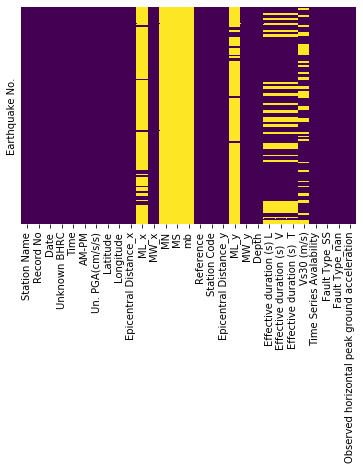

In [16]:
sns.heatmap(bhrc_update.isnull(),yticklabels=False,cbar=False,cmap='viridis') # cbar=color bar

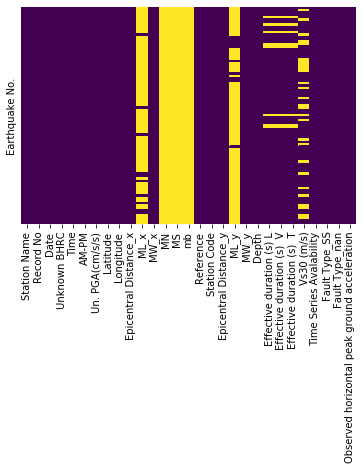

In [18]:
bhrc_update = bhrc_update[bhrc_update['Time Series Avalability']==1]
sns.heatmap(bhrc_update.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
bhrc_update.columns

Index(['Station Name', 'Record No', 'Date', 'Unknown BHRC', 'Time', 'AM-PM',
       'Un. PGA(cm/s/s)', 'Latitude', 'Longitude', 'Epicentral Distance_x',
       'ML_x', 'MW_x', 'MN', 'MS', 'mb', 'Reference', 'Station Code',
       'Epicentral Distance_y', 'ML_y', 'MW_y', 'Depth',
       'Effective duration (s) L', 'Effective duration (s)  V',
       'Effective duration (s)  T', 'Vs30 (m/s)', 'Time Series Avalability',
       'Fault Type_SS', 'Fault Type_nan',
       'Observed horizontal peak ground acceleration'],
      dtype='object')

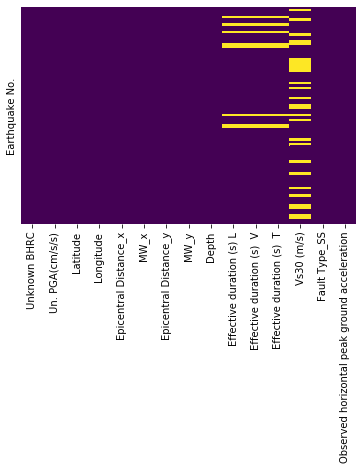

In [20]:
# Cleaning1
bhrc_update = bhrc_update.drop(['ML_x', 'MN', 'MS', 'mb','ML_y','Reference','Station Name','Station Code', 
                                'Time Series Avalability','Fault Type_nan','Record No','Date','Time', 'AM-PM'],axis=1)
sns.heatmap(bhrc_update.isnull(),yticklabels=False,cbar=False,cmap='viridis')

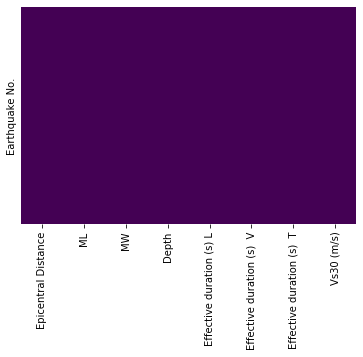

In [21]:
# Cleaning 2
for col in bhrc_update.columns:
    bhrc_update[col]=bhrc_update[col].fillna(bhrc_update[col].mean())
sns.heatmap(bhrc_ip.isnull(),yticklabels=False,cbar=False,cmap='viridis') # cbar=color bar

In [22]:
bhrc_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1 to 125
Data columns (total 15 columns):
Unknown BHRC                                    89 non-null int64
Un. PGA(cm/s/s)                                 89 non-null int64
Latitude                                        89 non-null float64
Longitude                                       89 non-null float64
Epicentral Distance_x                           89 non-null int64
MW_x                                            89 non-null float64
Epicentral Distance_y                           89 non-null int64
MW_y                                            89 non-null float64
Depth                                           89 non-null int64
Effective duration (s) L                        89 non-null float64
Effective duration (s)  V                       89 non-null float64
Effective duration (s)  T                       89 non-null float64
Vs30 (m/s)                                      89 non-null float64
Fault Type_SS         

In [23]:
bhrc_update.to_csv('Final Analytics Ready Data',index=False)

In [24]:

X = bhrc_update.drop('Observed horizontal peak ground acceleration',axis=1)

y = bhrc_update['Observed horizontal peak ground acceleration']

In [25]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# After scaling the data - still same data
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predict_log = logmodel.predict(X_test)
prob_log =logmodel.predict_proba(X_test)

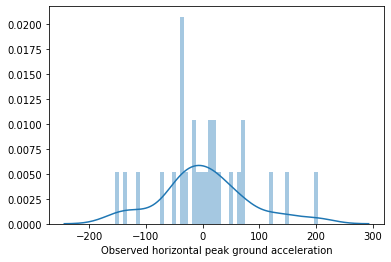

In [31]:
sns.distplot((y_test-predict_log),bins=50)

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_log))
print('MSE:', metrics.mean_squared_error(y_test, predict_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_log)))

MAE: 58.666666666666664
MSE: 6148.740740740741
RMSE: 78.41390655196781


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train,y_train)
#predict_knn_test = knn.predict(X_test)

In [35]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i,)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(metrics.mean_squared_error(y_test, pred_i))  # MSE

Text(0, 0.5, 'Error Rate')

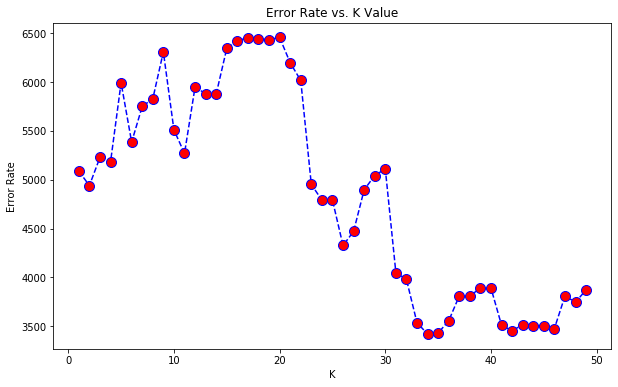

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
# Lets choose k=33, by looking at elbow/Hit and Trail
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)
predict_knn = knn.predict(X_test)
prob_knn = knn.predict_proba(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predict_knn))
print('MSE:', metrics.mean_squared_error(y_test, predict_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_knn)))

MAE: 42.148148148148145
MSE: 3535.3333333333335
RMSE: 59.45866911841648


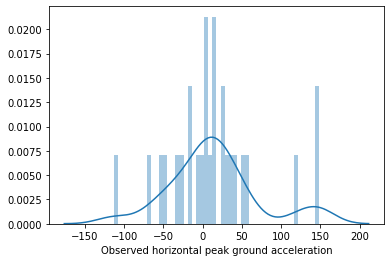

In [38]:
sns.distplot((y_test-predict_knn),bins=50)

In [ ]:
# Earlier value was classified
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
prob_rfc = rfc.predict_proba(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_rfc))
print('MSE:', metrics.mean_squared_error(y_test, predict_rfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_rfc)))

MAE: 70.66666666666667
MSE: 12836.37037037037
RMSE: 113.29770681867471


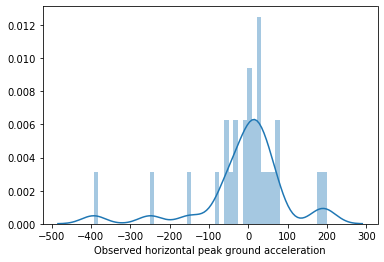

In [40]:
sns.distplot((y_test-predict_rfc),bins=50)

array([[0.01995031, 0.0100929 , 0.00437241, ..., 0.01816346, 0.00298587,
        0.01632645],
       [0.01366162, 0.01524924, 0.03452406, ..., 0.01459565, 0.02600493,
        0.00292507],
       [0.01631831, 0.00385861, 0.00585272, ..., 0.01570799, 0.03019698,
        0.00467213],
       ...,
       [0.02195196, 0.01119279, 0.01718005, ..., 0.0139089 , 0.00318188,
        0.01053397],
       [0.00632974, 0.02890315, 0.00383576, ..., 0.00456459, 0.008892  ,
        0.00493844],
       [0.0266743 , 0.00499018, 0.03262955, ..., 0.01490784, 0.01563567,
        0.00269491]])

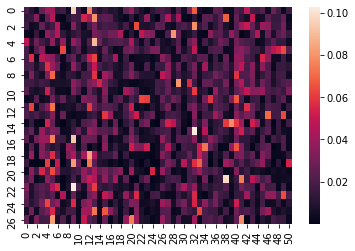

In [41]:
# Shows probablity of correctness once ensembling is done
final_prob = (prob_knn + prob_log + prob_rfc)/3 
sns.heatmap(final_prob)
final_prob

# More brighter, better results

In [42]:
# Averaging Ensemble Technique
predict_ensemble=(predict_knn+predict_log+predict_rfc)/3
print('MAE:', metrics.mean_absolute_error(y_test, predict_ensemble))
print('MSE:', metrics.mean_squared_error(y_test, predict_ensemble))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_ensemble)))

MAE: 39.20987654320987
MSE: 3107.1687242798357
RMSE: 55.74198349789713


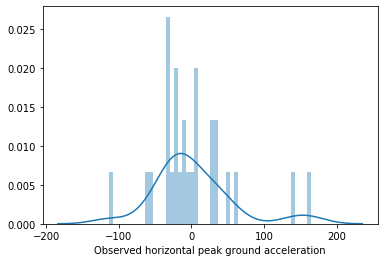

In [43]:
sns.distplot((y_test- predict_ensemble),bins=50)

### Now we have 4 models ready
1. Logistic Regression
2. KNN
3. Random Forest
4. Ensemble model

##### We will compare all these model among eachother and the predicted data given from an already created model

In [44]:
MAE =[metrics.mean_absolute_error(y_test, predict_log),
   metrics.mean_absolute_error(y_test, predict_knn),
   metrics.mean_absolute_error(y_test, predict_rfc),
   metrics.mean_absolute_error(y_test, predict_ensemble)]

MSE = [metrics.mean_squared_error(y_test, predict_log),
                               metrics.mean_squared_error(y_test, predict_knn),
                               metrics.mean_squared_error(y_test, predict_rfc),
                               metrics.mean_squared_error(y_test, predict_ensemble)
                               ]

RMSE = [np.sqrt(metrics.mean_squared_error(y_test, predict_log)),
                               np.sqrt(metrics.mean_squared_error(y_test, predict_knn)),
                                np.sqrt(metrics.mean_squared_error(y_test, predict_rfc)),
                                np.sqrt(metrics.mean_squared_error(y_test, predict_ensemble))
                               ]

In [45]:
Results=pd.DataFrame()
Results['Model'] = ['Logistic Regression','KNN','Random Forest','Ensemble']
Results['MAE'] = MAE
Results['MSE'] = MSE
Results['RMSE'] = RMSE
Results

,Model,MAE,MSE,RMSE
0,Logistic Regression,58.666667,6148.740741,78.413907
1,KNN,42.148148,3535.333333,59.458669
2,Random Forest,70.666667,12836.370370,113.297707
3,Ensemble,39.209877,3107.168724,55.741983


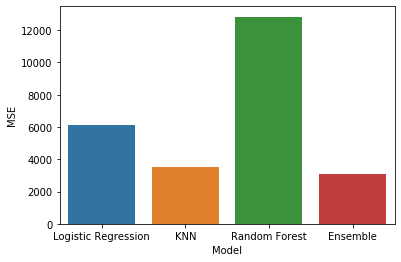

In [51]:
sns.barplot(x='Model',y='MSE',data=Results)

In [47]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

In [52]:
Results.iplot(kind='bar',x='Model',y='RMSE',title='Comparing RMSE of different models', xTitle='Models', yTitle='Root Mean Squared Error')

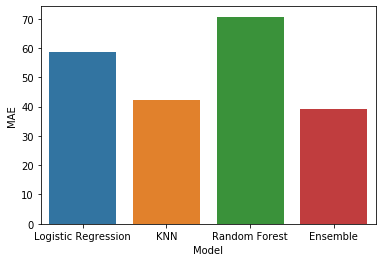

In [50]:
# Comparing 4 models on basis of MAE
sns.barplot(x='Model',y='MAE',data=Results)

### So we can see that Averaging Ensemble model is much more efficient than the previously predicted model.

### Now lets check using **Blending Ensemble** model

In [53]:
# Creating one validation set

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(scaled_features), y, test_size=0.2, random_state=101)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101) # validation

In [54]:
#model1 = 
rfc.fit(X_train, y_train)
val_pred_rfc=rfc.predict(X_val)
test_pred_rfc=rfc.predict(X_test)
#val_pred_rfc=pd.DataFrame(rfc.predict(X_val))
#test_pred_rfc=pd.DataFrame(rfc.predict(X_test))

#model2 = KNeighborsClassifier()
knn.fit(X_train,y_train)
val_pred_knn=knn.predict(X_val)
test_pred_knn=knn.predict(X_test)
#val_pred_knn=pd.DataFrame(val_pred_knn)
#test_pred_knn=pd.DataFrame(test_pred_knn)

In [56]:
#df_val=pd.concat([X_val, val_pred_rfc,val_pred_knn],axis=1)
df_val = X_val
df_val['pred_rfc']=val_pred_rfc
df_val['pred_knn']=val_pred_knn
#df_test=pd.concat([X_test, test_pred_rfc,test_pred_knn],axis=1)
df_test = X_test
df_test['pred_rfc']=test_pred_rfc
df_test['pred_knn']=test_pred_knn


In [57]:
#model = LogisticRegression()
logmodel.fit(df_val,y_val)  # training the model based on validation set
#logmodel.score(df_test,y_test) #score based on test set
blending_predict=logmodel.predict(df_test)

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [58]:
print('MAE:', metrics.mean_absolute_error(y_test,blending_predict))
print('MSE:', metrics.mean_squared_error(y_test, blending_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, blending_predict)))

MAE: 55.388888888888886
MSE: 5441.055555555556
RMSE: 73.76351100344638


### Lets stick to averaging ensemblimg model which is performing better than blending model